In [1]:
import pandas as pd
import functions as func
import numpy as np
import seaborn as sns

In [2]:
# load data sets
db_locations = func.import_yaml()

#load df
df = pd.read_csv(db_locations['data_raw']['train'])
df_test = pd.read_csv(db_locations['data_raw']['test'])


In [3]:
#Basic EDA and 

In [4]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
df.shape

(27481, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [9]:
df[df.isna().any(axis=1)]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [10]:
# drop row with no data on text, it has no importance
df.dropna(inplace= True)

In [11]:
df.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

<Axes: xlabel='count', ylabel='sentiment'>

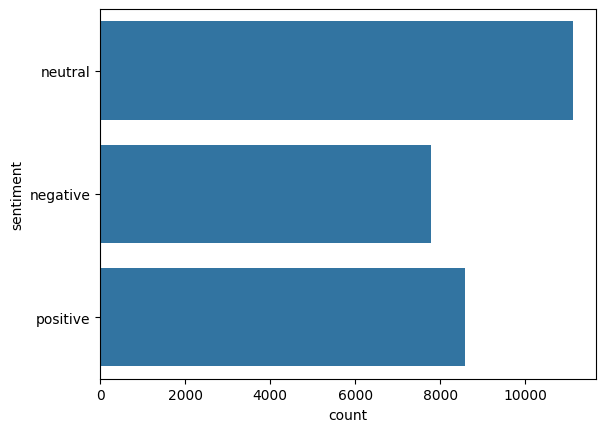

In [12]:
sns.countplot(df['sentiment'])

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# Transform the column setimenment in int for esay usage 
df = func.sentiment_to_int(df)


/home/tiago/Documents/GitHub/Projects/final_project/notebooks/functions.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})


In [15]:
df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [16]:
df_test.shape

(3534, 3)

In [17]:
df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

<Axes: xlabel='count', ylabel='sentiment'>

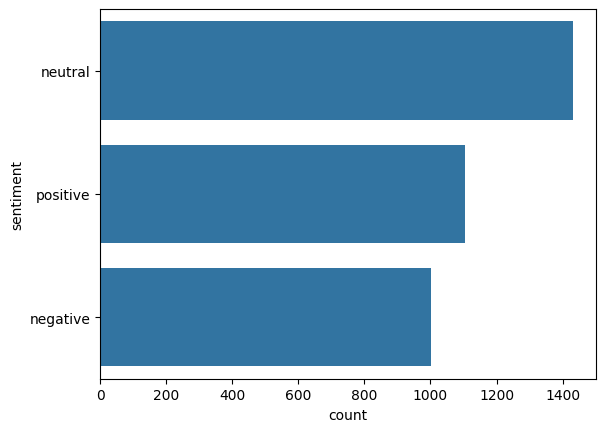

In [18]:
sns.countplot(df_test['sentiment'])

In [19]:
df_test = func.sentiment_to_int(df_test)

/home/tiago/Documents/GitHub/Projects/final_project/notebooks/functions.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})


In [20]:
df.to_csv(db_locations['data_clean']['train'],index = False)
df_test.to_csv(db_locations['data_clean']['test'],index = False)